# Fluxonium Design with 4 single qubits

### Preparations

In [1]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxtryH import FluxoniumPocket

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
#from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

#from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround

#from qiskit_metal.renderers.renderer_gds.gds_renderer import QGDSRenderer
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer
from qiskit_metal.analyses.quantization import LOManalysis

from qiskit_metal.analyses.sweep_and_optimize.sweeping import Sweeping


import pyEPR as epr
from qiskit_metal.analyses.quantization import EPRanalysis
#from qiskit_metal.analyses.quantization import EPRanalysis


In [2]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'
design.variables['cpw_width'] = '10 um'
design.variables['cpw_gap'] = '6 um'
design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True


eig_qres = EPRanalysis(design, "hfss")
hfss = design.renderers.hfss
hfss = eig_qres.sim.renderer
q3d = design.renderers.q3d


gui = MetalGUI(design)

In [3]:
#Setup the launchpad Read In and Out location and orientation

## Read In launch pad TOP
launch_options = dict(chip='main', pos_x='4.4mm', pos_y='4.4mm', orientation='180'
                    )
lp = LaunchpadWirebond(design, 'LPReadIn1', options = launch_options)


# Read Out launch pad TOP
launch_options = dict(chip='main', pos_x='-4.4mm', pos_y='4.4mm', orientation='0'
                    )
lp = LaunchpadWirebond(design, 'LPReadOut1', options = launch_options)

## Read In launch pad BOTTOM
launch_options = dict(chip='main', pos_x='4.4mm', pos_y='-4.4mm', orientation='180'
                    )
lp = LaunchpadWirebond(design, 'LPReadIn2', options = launch_options)


# Read Out launch pad BOTTOM
launch_options = dict(chip='main', pos_x='-4.4mm', pos_y='-4.4mm', orientation='0'
                    )
lp = LaunchpadWirebond(design, 'LPReadOut2', options = launch_options)


gui.rebuild()

In [4]:
Tranmission_Line = {'pin_inputs':
            {'start_pin': {'component': 'LPReadIn1', 'pin': 'tie'},
             'end_pin': {'component': 'LPReadOut1', 'pin': 'tie'}},
            'lead': {}, 'total_length': '7mm', 'fillet': "110um"
            }

TransLine = RoutePathfinder(design, 'TL1', Tranmission_Line)


Tranmission_Line = {'pin_inputs':
            {'start_pin': {'component': 'LPReadIn2', 'pin': 'tie'},
             'end_pin': {'component': 'LPReadOut2', 'pin': 'tie'}},
            'lead': {}, 'total_length': '7mm', 'fillet': "110um"
            }

TransLine = RoutePathfinder(design, 'TL2', Tranmission_Line)

gui.rebuild()

In [5]:
#Setup the launchpads for all Flux-Biases and Charge Lines location and orientation
## Q1 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.4mm', pos_y='3.0mm', orientation='180'
                    )
lp = LaunchpadWirebond(design, 'LPFB1', options = launch_options)

launch_options = dict(chip='main', pos_x='4.4mm', pos_y='1.5mm', orientation='180'
                    )
lp = LaunchpadWirebond(design, 'LPCL1', options = launch_options)


## Q2 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.4mm', pos_y='2.5mm', orientation='0'
                    )
lp = LaunchpadWirebond(design, 'LPFB2', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.4mm', pos_y='1.0mm', orientation='0'
                    )
lp = LaunchpadWirebond(design, 'LPCL2', options = launch_options)


## Q3 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.4mm', pos_y='-0.5mm', orientation='0'
                    )
lp = LaunchpadWirebond(design, 'LPCL3', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.4mm', pos_y='-1.5mm', orientation='0'
                    )
lp = LaunchpadWirebond(design, 'LPFB3', options = launch_options)


## Q4 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.4mm', pos_y='-1.5mm', orientation='180'
                    )
lp = LaunchpadWirebond(design, 'LPCL4', options = launch_options)

launch_options = dict(chip='main', pos_x='4.4mm', pos_y='-3.0mm', orientation='180'
                    )
lp = LaunchpadWirebond(design, 'LPFB4', options = launch_options)


gui.rebuild()

In [6]:
from qiskit_metal.qlibrary.qubits.fluxtryH import FluxoniumPocket


options = dict(chip='main',
    orientation =0, pos_x = '1.8mm', pos_y = '2.3mm',
               
    flux_bias_line_options=Dict(#make_fbl = True
                               ), 
               
    charge_line_options=Dict(loc_H = -1, #make_cl = True,                    
                            ), 
    readout_line_options=Dict(loc_H = +1, #make_rol = True, 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
      #  gds_cell_name ='FakeJunction_01',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))


options = dict(chip='main',
    orientation =180, pos_x = '-2.5mm', pos_y = '2mm',
               
    flux_bias_line_options=Dict(#make_fbl = True
                               ), 
               
    charge_line_options=Dict(loc_H = +1, #make_cl = True,                    
                            ), 
    readout_line_options=Dict(loc_H = -1, #make_rol = True, 
              ) )
               
q2 = FluxoniumPocket(design,'Q2', options = dict(
      #  gds_cell_name ='FakeJunction_01',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))

options = dict(chip='main',
    orientation =180, pos_x = '-2.5mm', pos_y = '-1.8mm',
               
    flux_bias_line_options=Dict(#make_fbl = True
                               ), 
               
    charge_line_options=Dict(loc_H = -1, #make_cl = True,                    
                            ), 
    readout_line_options=Dict(loc_H = +1, #make_rol = True, 
              ) )
               
q3 = FluxoniumPocket(design,'Q3', options = dict(
      #  gds_cell_name ='FakeJunction_01',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))

options = dict(chip='main',
    orientation =0, pos_x = '2.0mm', pos_y = '-2.5mm',
               
    flux_bias_line_options=Dict(#make_fbl = True
                               ), 
               
    charge_line_options=Dict(loc_H = +1, #make_cl = True,                    
                            ), 
    readout_line_options=Dict(loc_H = -1, #make_rol = True, 
              ) )
               
q4 = FluxoniumPocket(design,'Q4', options = dict(
      #  gds_cell_name ='FakeJunction_01',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))

gui.rebuild()

In [7]:
stg1 = ShortToGround(design, 'stg1s', options=dict(chip='main', pos_x='2.0mm',  pos_y='4.25mm', orientation='0'))
rt_meander = RouteMeander(design, 'cavity1',  Dict(
        total_length='4.5mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='stg1s', pin='short'),
            end_pin=Dict(component='Q1', pin='readout_line')), ))

stg2 = ShortToGround(design, 'stg2s', options=dict(chip='main', pos_x='-2.5mm',  pos_y='4.25mm', orientation='0'))
rt_meander = RouteMeander(design, 'cavity2',  Dict(
        total_length='5.5mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='stg2s', pin='short'),
            end_pin=Dict(component='Q2', pin='readout_line')), ))

stg3 = ShortToGround(design, 'stg3s', options=dict(chip='main', pos_x='-3.0mm',  pos_y='-4.25mm', orientation='180'))
rt_meander = RouteMeander(design, 'cavity3',  Dict(
        total_length='6.5mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='stg3s', pin='short'),
            end_pin=Dict(component='Q3', pin='readout_line')), ))

stg4 = ShortToGround(design, 'stg4s', options=dict(chip='main', pos_x='1.5mm',  pos_y='-4.25mm', orientation='180'))
rt_meander = RouteMeander(design, 'cavity4',  Dict(
        total_length='3.5mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='stg4s', pin='short'),
            end_pin=Dict(component='Q4', pin='readout_line')), ))

gui.rebuild()
gui.autoscale()

In [8]:
# Charge Lıne and Flux Bias Line for Q1
ZFluxBias_LineQ1 = RoutePathfinder(design, 'Z_Gate1', options = dict(chip='main',
                                                                fillet='99um',
                                lead=dict(start_straight='50um', end_straight='500um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='LPFB1',
                                                    pin='tie'),
                                                end_pin=Dict(
                                                    component='Q1',
                                                    pin='flux_bias_line')
                                            )))



gui.rebuild()

In [9]:
XYCharge_LineQ1 = RoutePathfinder(design, 'XY_Gate1', options = dict(chip='main',
                                                                fillet='99um',
                                lead=dict(start_straight='50um', end_straight='20um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='LPCL1',
                                                    pin='tie'),
                                                end_pin=Dict(
                                                    component='Q1',
                                                    pin='charge_line')
                                            )))

gui.rebuild()

In [10]:
# Charge Lıne and Flux Bias Line for Q2
ZFluxBias_LineQ2 = RoutePathfinder(design, 'Z_Gate2', options = dict(chip='main',
                                                                fillet='99um',
                                lead=dict(start_straight='50um', end_straight='500um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='LPFB2',
                                                    pin='tie'),
                                                end_pin=Dict(
                                                    component='Q2',
                                                    pin='flux_bias_line')
                                            )))

XYCharge_LineQ2 = RoutePathfinder(design, 'XY_Gate2', options = dict(chip='main',
                                                                fillet='99um',
                                lead=dict(start_straight='50um', end_straight='20um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='LPCL2',
                                                    pin='tie'),
                                                end_pin=Dict(
                                                    component='Q2',
                                                    pin='charge_line')
                                            )))
gui.rebuild()

In [11]:
# Charge Lıne and Flux Bias Line for Q3
ZFluxBias_LineQ3 = RoutePathfinder(design, 'Z_Gate3', options = dict(chip='main',
                                                                fillet='99um',
                                lead=dict(end_straight='300um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='LPFB3',
                                                    pin='tie'),
                                                end_pin=Dict(
                                                    component='Q3',
                                                    pin='flux_bias_line')
                                            )))


XYCharge_LineQ3 = RoutePathfinder(design, 'XY_Gate3', options = dict(chip='main',
                                                                fillet='99um',
                                lead=dict(end_straight='0.1mm'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='LPCL3',
                                                    pin='tie'),
                                                end_pin=Dict(
                                                    component='Q3',
                                                    pin='charge_line')
                                            )))

gui.rebuild()


In [12]:
# Charge Lıne and Flux Bias Line for Q4
ZFluxBias_LineQ4 = RoutePathfinder(design, 'Z_Gate4', options = dict(chip='main',
                                                                fillet='99um',
                                lead=dict(end_straight='0.1mm'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='LPFB4',
                                                    pin='tie'),
                                                end_pin=Dict(
                                                    component='Q4',
                                                    pin='flux_bias_line')
                                            )))

XYCharge_LineQ4 = RoutePathfinder(design, 'XY_Gate4', options = dict(chip='main',
                                                                fillet='99um',
                                lead=dict(end_straight='20um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='LPCL4',
                                                    pin='tie'),
                                                end_pin=Dict(
                                                    component='Q4',
                                                    pin='charge_line')
                                            )))
gui.rebuild()

In [13]:
q1 #print Q1 information


name:    Q1
class:   FluxoniumPocket       
options: 
  'pos_x'             : '1.8mm',                      
  'pos_y'             : '2.3mm',                      
  'connection_pads'   : {
                        },
  'chip'              : 'main',                       
  'width'             : '1000um',                     
  'height'            : '1000um',                     
  'pad_gap'           : '30um',                       
  'inductor_width'    : '10um',                       
  'pad_width'         : '15um',                       
  'pad_height'        : '200um',                      
  'pad_radius'        : '50um',                       
  'l_width'           : '1um',                        
  'l_arm_length'      : '50um',                       
  'l_inductance'      : '200nH',                      
  'l_ind_per_square'  : '2nH',                        
  'l_fillet'          : '5um',                        
  'L_j'               : '16.35nH',                    
  'pocket_wid

In [56]:
import pyEPR

print(pyEPR.config.dissipation)

AttrDict({'tan_delta_sapp': 1e-06, 'epsi': 10, 'th': 3e-09, 'eps_r': 10, 'tan_delta_surf': 0.001, 'surface_Rs': 2.5e-07, 'gseam': 1000.0})


In [7]:
??eprd.dissipation

Object `eprd.dissipation` not found.


In [9]:
design.chips.main

{'material': 'silicon',
 'layer_start': '0',
 'layer_end': '2048',
 'size': {'center_x': '0.0mm',
  'center_y': '0.0mm',
  'center_z': '0.0mm',
  'size_x': '5mm',
  'size_y': '5mm',
  'size_z': '-750um',
  'sample_holder_top': '890um',
  'sample_holder_bottom': '1650um'}}

In [140]:
design.chips.main.size

{'center_x': '0.0mm',
 'center_y': '0.0mm',
 'center_z': '0.0mm',
 'size_x': '5mm',
 'size_y': '5mm',
 'size_z': '-750um',
 'sample_holder_top': '890um',
 'sample_holder_bottom': '1650um'}

In [27]:
# Look at the options of the launch pad in QDesign.
lp.options

{'layer': '1',
 'trace_width': '300um',
 'trace_height': '300um',
 'trace_gap': '300um',
 'lead_length': 'cpw_width',
 'neck_height': '200um',
 'cpw_gap': 'cpw_gap',
 'pos_x': '-1.8mm',
 'pos_y': '-1.8mm',
 'orientation': '0',
 'chip': 'main'}

In [28]:
design.net_info

,net_id,component_id,pin_name
0,41,1,tie
1,41,3,start
2,42,2,tie
3,42,3,end
4,43,13,tie
5,43,14,start
6,44,12,fl1
7,44,14,end
8,45,17,short
9,45,18,start


In [12]:
q1.pins.readout
q1.pins['ro1']

{'points': [array([-1.404, -0.115]), array([-1.396, -0.115])],
 'middle': array([-1.4  , -0.115]),
 'normal': array([0., 1.]),
 'tangent': array([-1.,  0.]),
 'width': 0.008,
 'gap': 0.0048,
 'chip': 'main',
 'parent_name': 4,
 'net_id': 22,
 'length': 0}

In [30]:
q1.pins.readout
q1.pins['fl1']

{'points': [array([-1.396, -1.245]), array([-1.404, -1.245])],
 'middle': array([-1.4  , -1.245]),
 'normal': array([ 0., -1.]),
 'tangent': array([ 1., -0.]),
 'width': 0.008,
 'gap': 0.0048,
 'chip': 'main',
 'parent_name': 12,
 'net_id': 44,
 'length': 0}

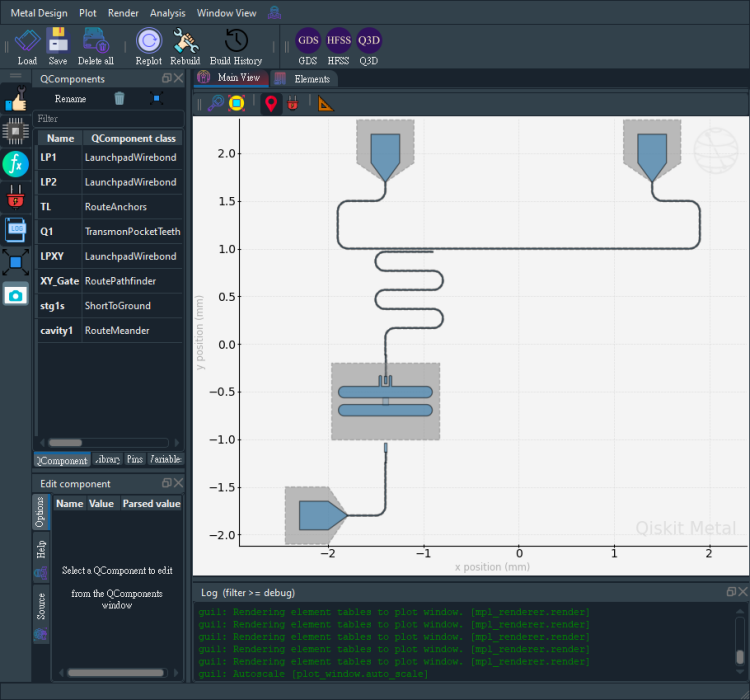

In [141]:
#Save screenshot as a .png formatted file.
gui.screenshot()

In [76]:
gui.main_window.close()

True

## Ansys QRenderer
How to Render a Metal Design into Ansys

!!!Make sure the programm is ready completly.

In [11]:
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer
QAnsysRenderer.default_options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.2,
 'y_buffer_width_mm': 0.2,
 'wb_threshold': '400mm',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [21]:
hfss.open_ansys()

In [22]:
hfss.connect_ansys()

INFO 04:06PM [connect_project]: Connecting to Ansys Desktop API...
INFO 04:06PM [load_ansys_project]: 	Opened Ansys App
INFO 04:06PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 04:06PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/METAL/Documents/Ansoft/
	Project:   Project119
INFO 04:06PM [connect_design]: No active design found (or error getting active design).
INFO 04:06PM [connect]: 	 Connected to project "Project119". No design detected


In [23]:
hfss.activate_eigenmode_design("cavity3")

04:06PM 09s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
04:06PM 09s WARNING [activate_ansys_design]: The design_name=cavity3 was not in active project.  Designs in active project are: 
[].  A new design will be added to the project.  
INFO 04:06PM [connect_design]: 	Opened active design
	Design:    cavity3 [Solution type: Eigenmode]
WARNING 04:06PM [connect_setup]: 	No design setup detected.
WARNING 04:06PM [connect_setup]: 	Creating eigenmode default setup.
INFO 04:06PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [24]:
hfss.render_design(['cavity1'], [('cavity1', 'end')])

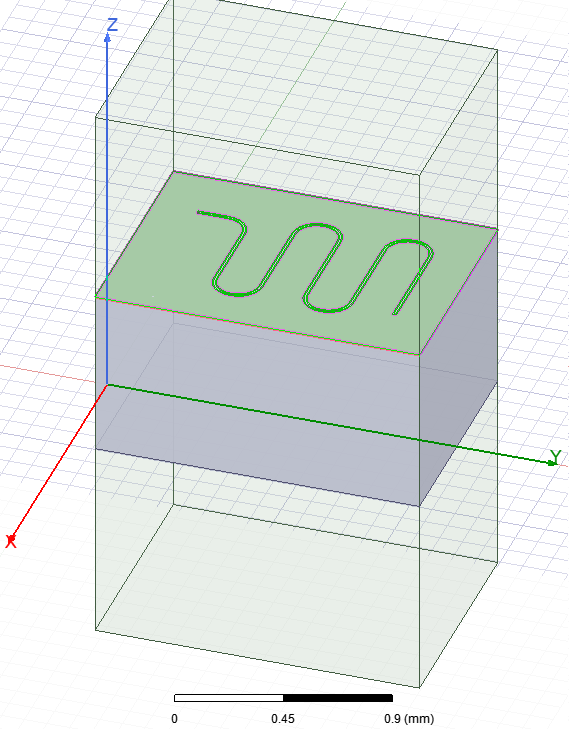

WindowsPath('C:/Users/METAL/Documents/qiskit_metal_fgn/tutorials/Figen/TeethDesignNEW/ansys.png')

In [28]:
hfss.save_screenshot()

In [25]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 20
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '10 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 04:06PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 20
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


12:12PM 47s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


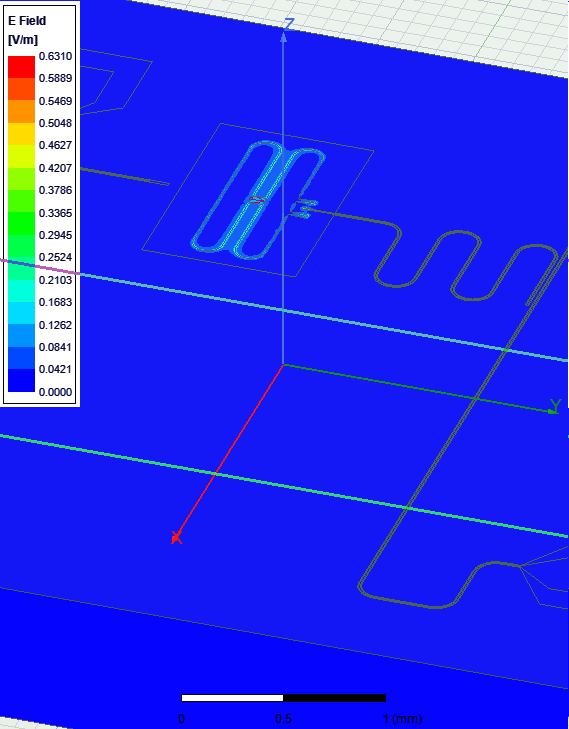

WindowsPath('C:/Users/METAL/Documents/qiskit_metal_fgn/tutorials/Figen/TeethDesignNEW/ansys.png')

In [43]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [37]:
hfss.epr_get_frequencies()

Design "cavity3" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,8.442337,inf


In [18]:
QAnsysRenderer.get_template_options(design)

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.2,
 'y_buffer_width_mm': 0.2,
 'wb_threshold': '400mm',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [19]:
QAnsysRenderer.default_setup

{'drivenmodal': {'name': 'Setup',
  'freq_ghz': '5.0',
  'max_delta_s': '0.1',
  'max_passes': '10',
  'min_passes': '1',
  'min_converged': '1',
  'pct_refinement': '30',
  'basis_order': '1'},
 'eigenmode': {'name': 'Setup',
  'min_freq_ghz': '1',
  'n_modes': '1',
  'max_delta_f': '0.5',
  'max_passes': '10',
  'min_passes': '1',
  'min_converged': '1',
  'pct_refinement': '30',
  'basis_order': '-1'},
 'q3d': {'name': 'Setup',
  'freq_ghz': '5.0',
  'save_fields': 'False',
  'enabled': 'True',
  'max_passes': '15',
  'min_passes': '2',
  'min_converged_passes': '2',
  'percent_error': '0.5',
  'percent_refinement': '30',
  'auto_increase_solution_order': 'True',
  'solution_order': 'High',
  'solver_type': 'Iterative'},
 'port_inductor_gap': '10um'}

In [2]:
hfss.disconnect_ansys()

NameError: name 'hfss' is not defined

In [60]:
hfss.clean_active_design()

In [12]:
hfss.activate_eigenmode_design("allchip")

04:03PM 41s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
INFO 04:03PM [connect_design]: 	Opened active design
	Design:    allchip [Solution type: Eigenmode]


In [11]:
hfss.options['x_buffer_width_mm'] = 0.5
hfss.options['y_buffer_width_mm'] = 0.5
hfss.options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.5,
 'y_buffer_width_mm': 0.5,
 'wb_threshold': '400mm',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [40]:
design.qgeometry.tables['junction']

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,hfss_resistance,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name
0,10,rect_jj,"LINESTRING (-1.40000 -0.63500, -1.40000 -0.56500)",1,False,False,main,0.06,9nH,0,0,0.000007,9nH,0,0,0.000007,FakeJunction_01


In [41]:
hfss.render_design()
#hfss.save_screenshot()

In [42]:
# Analysis properties
setup = hfss.pinfo.setup
setup.n_modes = 2
setup.passes = 15
#setup.delta_f = 0.05
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', '10 nH')
pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()


Number of eigenmodes to find             = 2
Number of simulation passes              = 15
Convergence freq max delta percent diff  = 0.1



INFO 11:46AM [analyze]: Analyzing setup Setup


This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


02:04PM 58s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


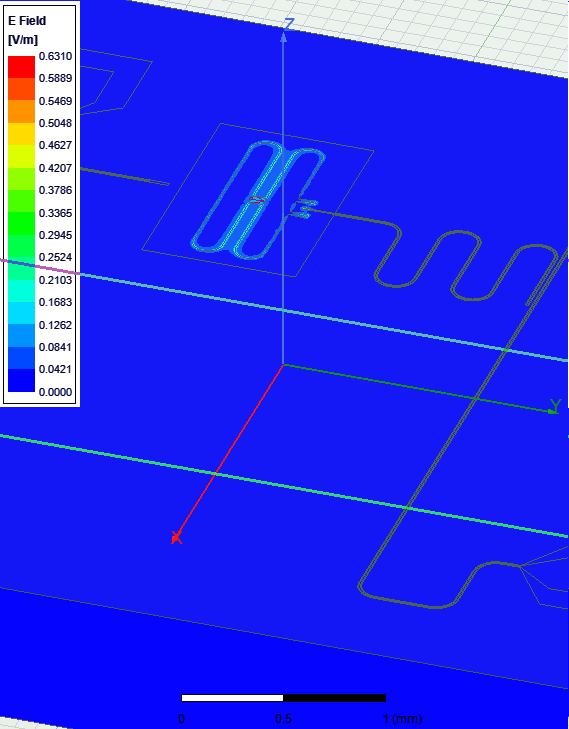

WindowsPath('C:/Users/METAL/Documents/qiskit_metal_fgn/tutorials/Figen/TeethDesignNEW/ansys.png')

In [44]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [46]:
hfss.plot_ansys_delete(['Mag_E1'])

02:05PM 07s WARNING [plot_ansys_delete]: This method is deprecated. Change your scripts to use clear_fields()


In [47]:
hfss.set_mode(2, "Setup")

INFO 02:05PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


02:05PM 18s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


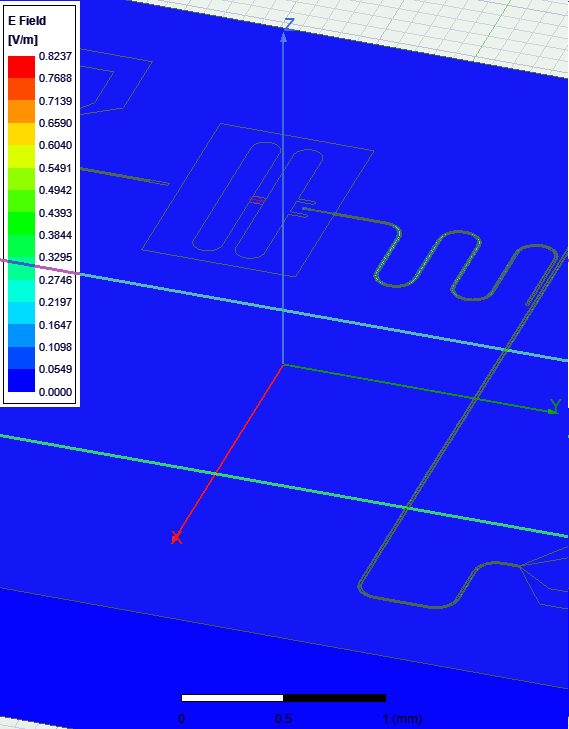

WindowsPath('C:/Users/METAL/Documents/qiskit_metal_fgn/tutorials/Figen/TeethDesignNEW/ansys.png')

In [48]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [49]:
hfss.plot_ansys_delete(['Mag_E1'])

02:05PM 24s WARNING [plot_ansys_delete]: This method is deprecated. Change your scripts to use clear_fields()


In [70]:
hfss.set_mode(3, "Setup")

INFO 02:25PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [71]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')

02:25PM 56s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


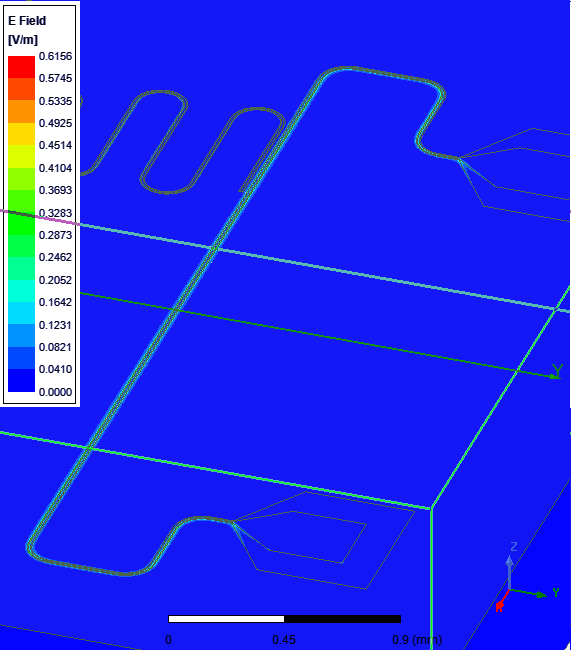

WindowsPath('C:/Users/METAL/Documents/qiskit_metal_fgn/tutorials/Figen/TeethDesignNEW/ansys.png')

In [72]:
hfss.save_screenshot()

In [50]:
hfss.plot_ansys_delete(['Mag_E1'])

02:05PM 33s WARNING [plot_ansys_delete]: This method is deprecated. Change your scripts to use clear_fields()


### Set up EPR parameters
Specify the junctions in the model; in this case there's only one, namely 'jj'.

In [51]:
#Non-linear (Josephson) junction
pinfo = hfss.pinfo # Project info
pinfo.junctions['jj'] = {'Lj_variable': 'Lj', 'rect': 'JJ_rect_Lj_Q1_rect_jj', 
                             'line': 'JJ_Lj_Q1_rect_jj_',  'Cj_variable': 'Cj'}
pinfo.validate_junction_info() # Check that valid names of variables and objects have been supplied
pinfo.dissipative['dielectrics_bulk'] = ['main'] # Dissipative elements: specify
# Handles  microwave analysis on eigenmode solutions
eprd = epr.DistributedAnalysis(pinfo)

Design "allchip" info:
	# eigenmodes    2
	# variations    1


In [52]:
ℰ_elec = eprd.calc_energy_electric()
ℰ_elec_substrate = eprd.calc_energy_electric(None, 'main')
ℰ_mag = eprd.calc_energy_magnetic()

print(f"""
ℰ_elec_all       = {ℰ_elec}
ℰ_elec_substrate = {ℰ_elec_substrate}
EPR of substrate = {ℰ_elec_substrate / ℰ_elec * 100 :.1f}%

ℰ_mag_all       = {ℰ_mag}
ℰ_mag % of ℰ_elec_all  = {ℰ_mag / ℰ_elec * 100 :.1f}%
""")


ℰ_elec_all       = 1.62426309028535e-24
ℰ_elec_substrate = 1.48960318679882e-24
EPR of substrate = 91.7%

ℰ_mag_all       = 1.62424058347475e-24
ℰ_mag % of ℰ_elec_all  = 100.0%



### Run EPR analysis

Perform EPR analysis for all modes and variations. Here, Quantum Analysis starts.

In [53]:
eprd.do_EPR_analysis()

# 4a. Perform Hamiltonian spectrum post-analysis, building on mw solutions using EPR
epra = epr.QuantumAnalysis(eprd.data_filename)
epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 7)

# 4b. Report solved results
swp_variable = 'Lj' # suppose we swept an optimetric analysis vs. inductance Lj_alice
epra.plot_hamiltonian_results(swp_variable=swp_variable)
epra.report_results(swp_variable=swp_variable, numeric=True)


Variation 0  [1/1]

  Mode 0 at 4.59 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.8%  2.586e-24 3.041e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.36%
	jj              0.888612  (+)        0.0148137
		(U_tot_cap-U_tot_ind)/mean=5.98%
Calculating Qdielectric_main for mode 0 (0/1)
p_dielectric_main_0 = 0.921112345529054

  Mode 1 at 7.84 GHz   [2/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%  8.121e-25 8.121e-25

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 95.37%
	jj              0.000129479  (+)        6.28568e-06
		(U_tot_cap-U_tot_ind)/mean=-0.01%
Calculating Qdielectri

WARNING 02:06PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project117\allchip\2021-09-23 14-05-38.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.127999
1    0.577751
dtype: float64

Pm_norm idx =
      jj
0   True
1  False
*** P (participation matrix, not normlz.)
         jj
0  0.875640
1  0.000129

*** S (sign-bit matrix)
   s_jj
0     1
1     1
*** P (participation matrix, normalized.)
      0.99
   0.00013

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       158   0.0705
    0.0705 7.88e-06

*** Chi matrix ND (MHz) 
       170   0.0661
    0.0661  6.8e-06

*** Frequencies O1 PT (MHz)
0    4437.400798
1    7841.161717
dtype: float64

*** Frequencies ND (MHz)
0    4431.596076
1    7841.162066
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,10
eigenmode,
0,4437.40
1,7841.16


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0         1
Lj                    
10 0  170.05  6.61e-02
   1    0.07  6.80e-06

In [54]:
eprd.get_ansys_frequencies_all()

Freq. (GHz)  Quality Factor
variation mode                             
0         0        4.594952             inf
          1        7.841197             inf

In [3]:
??eprd.get_Qseam

Object `eprd.get_Qseam` not found.


In [55]:
eprd.get_Qsurface_all(1, '0')

Calculating Qsurface for mode 1 (1/1)
p_surf_1 = 0.0011806764643086842


Qsurf_1    846972.079337
dtype: float64

In [56]:
eprd.get_Qsurface_all(0, '0')

Calculating Qsurface for mode 0 (0/1)
p_surf_0 = 0.0011806764643086842


Qsurf_0    846972.079337
dtype: float64

In [169]:
eprd.get_Qseam(0, '0')

TypeError: get_Qseam() missing 1 required positional argument: 'variation'

In [80]:
eprd.get_variations()

OrderedDict([('0', "Cj='0fF' Lj='10nH'")])

In [5]:
??eprd.get_variations

Object `eprd.get_variations` not found.


In [4]:
??pyEPR

Object `pyEPR` not found.


In [94]:
??eprd.calc_avg_current_J_surf_mag

In [99]:
eprd.calc_avg_current_J_surf_mag('0', j_rect, 0)

NameError: name 'j_rect' is not defined

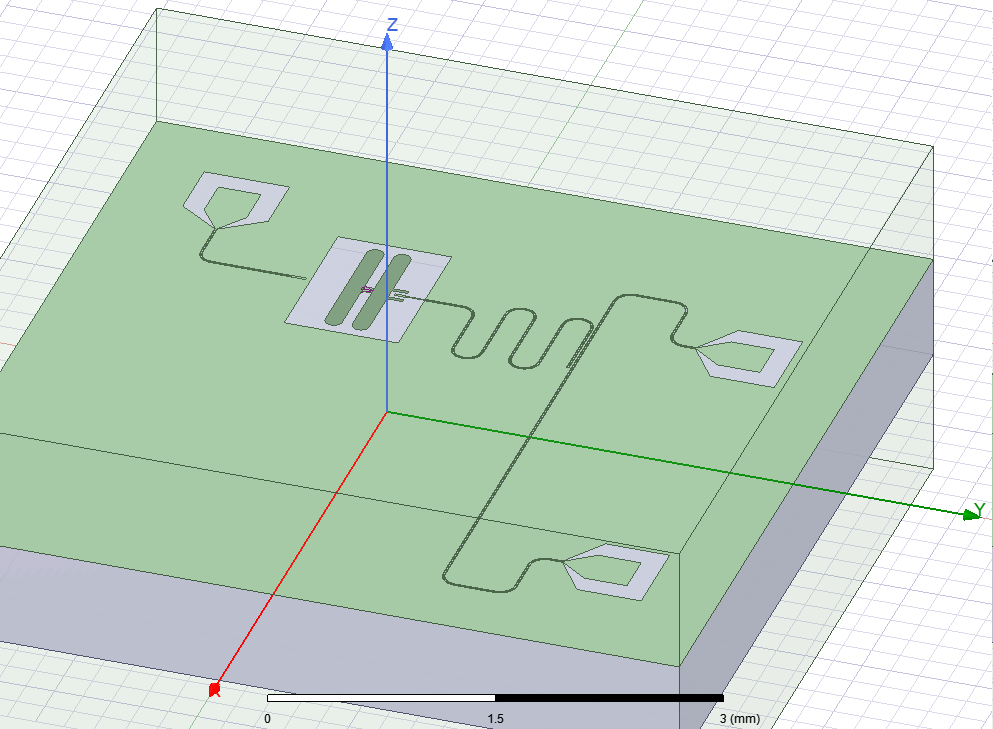

WindowsPath('C:/Users/METAL/Documents/qiskit_metal_fgn/tutorials/Figen/TeethDesignNEW/ansys.png')

In [81]:
hfss.save_screenshot()

In [13]:
hfss.disconnect_ansys()

Next we will look at a lumped oscillator model (LOM) for the same design.

## Render to Ansys Q3D

### Capacitance Analysis
Select the analysis you intend to run from the `qiskit_metal.analyses` collection.<br>
Select the design to analyze and the tool to use for any external simulation

In [116]:
c1 = LOManalysis(design, "q3d")

In [117]:
# example: update single setting
c1.sim.setup.max_passes = 6
# example: update multiple settings
c1.sim.setup_update(solution_order = 'Medium', auto_increase_solution_order = 'False')

c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 6,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

In [118]:
c1.sim.run(components=['Q1'], open_terminations=[('Q1', 'ro1'), ('Q1', 'fl1')])
c1.sim.capacitance_matrix

INFO 03:14PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:14PM [load_ansys_project]: 	Opened Ansys App
INFO 03:14PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 03:14PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/METAL/Documents/Ansoft/
	Project:   Project108
INFO 03:14PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 03:14PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:14PM [connect]: 	Connected to project "Project108" and design "Design_q3d" 😀 

INFO 03:14PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 03:14PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:14PM [analyze]: Analyzing setup Setup
INFO 03:14PM [get_matrix]: Exporting matrix data to (C:\Users\METAL\AppData\Local\Temp\tmp37r76lru.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell

,fl1_connector_pad_Q1,pad_bot_Q1,pad_top_Q1,ro1_connector_pad_Q1
fl1_connector_pad_Q1,289.08665,-93.20523,-94.70723,-23.54866
pad_bot_Q1,-93.20523,158.45826,-58.94090,-0.96581
pad_top_Q1,-94.70723,-58.94090,173.10867,-12.65251
ro1_connector_pad_Q1,-23.54866,-0.96581,-12.65251,37.38939


##### Selecting a design previously created

If you created a design with the above commands, it will be automatically selected and linked to this jupyter notebook session. Instead, if you want to use a design that had been created beforehand in the project, you can select it by following one of following three approaches:
* manually activating the design from the Ansys GUI, **before** you run the `fourq_hfss.start()` command. In the Ansys GUI, you will find the list of designs in the leftmost panel, and you can activate them with a double click.
* using method `fourq_q3d.connect_ansys(*with parameters*)`, specifying which design to connect to.
* using method `fourq_q3d.activate_ansys_design('name')`.

The next two cells exemplify how to use the last method. The first of the two cells below will create a new design because the name does not corrispond to any design in the project. The second cell will return to the previously created design.

NOTE: this method will also create a design with the given name if the design name is not found, to be able to create a new design it will need to be given the solution type, for example: `fourq_hfss.activate_ansys_design("newEigen", 'eigenmode')`. Failure to specify the type will result in an error message asking to specify the the `solution_type` parameter.

In [119]:
# c1.setup.run    <- direct access
c1.sim.print_run_args()

This analysis object run with the following kwargs:
{'name': None, 'components': ['Q1'], 'open_terminations': [('Q1', 'ro1'), ('Q1', 'fl1')], 'box_plus_buffer': True}



In [120]:
c1.sim.setup.freq_ghz = 4.8
c1.sim.run()
c1.sim.capacitance_matrix

INFO 03:14PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:14PM [analyze]: Analyzing setup Setup
INFO 03:15PM [get_matrix]: Exporting matrix data to (C:\Users\METAL\AppData\Local\Temp\tmpy4bhime9.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 1, False
INFO 03:15PM [get_matrix]: Exporting matrix data to (C:\Users\METAL\AppData\Local\Temp\tmpgq941smx.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 1, False
INFO 03:15PM [get_matrix]: Exporting matrix data to (C:\Users\METAL\AppData\Local\Temp\tmppr9tnoyk.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 2, False
INFO 03:15PM [get_matrix]: Exporting matrix data to (C:\Users\METAL\AppData\Local\Temp\tmpzeksw4jo.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 3, False
INFO 03:15PM [get_matrix]: Exporting matrix data to (C:\Users\METAL\AppData

,fl1_connector_pad_Q1,pad_bot_Q1,pad_top_Q1,ro1_connector_pad_Q1
fl1_connector_pad_Q1,289.08665,-93.20523,-94.70723,-23.54866
pad_bot_Q1,-93.20523,158.45826,-58.94090,-0.96581
pad_top_Q1,-94.70723,-58.94090,173.10867,-12.65251
ro1_connector_pad_Q1,-23.54866,-0.96581,-12.65251,37.38939


In [121]:
type(c1.sim.capacitance_matrix)

pandas.core.frame.DataFrame

### Lumped oscillator model (LOM)

Using capacitance matrices obtained from each pass, save the many parameters of the Hamiltonian of the system. `get_lumped_oscillator()` operates on 4 setup parameters: <br><br>
Lj: float <br>
Cj: float <br>
fr: Union[list, float] <br>
fb: Union[list, float] <br>

In [124]:
c1.setup.junctions = Dict({'Lj': 12.31, 'Cj': 2})
c1.setup.freq_readout = 7.0
c1.setup.freq_bus = []

c1.run_lom()
c1.lumped_oscillator_all

[1, 2] [3]
Predicted Values

Transmon Properties
f_Q 4.121185 [GHz]
EC 174.337218 [MHz]
EJ 13.273404 [GHz]
alpha -194.029571 [MHz]
dispersion 0.111439 [KHz]
Lq 12.305036 [nH]
Cq 111.107819 [fF]
T1 1206.825842 [us]

**Coupling Properties**

tCqbus1 -5.397741 [fF]
gbus1_in_MHz -53.315256 [MHz]
χ_bus1 -0.133771 [MHz]
1/T1bus1 131.878965 [Hz]
T1bus1 1206.825842 [us]
Bus-Bus Couplings


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,4.221377,183.351943,13.273404,-204.731855,0.202667,[-55.137871839117956],[-0.1602390226386057],0.160239,55.137872
2,4.238043,184.875837,13.273404,-206.546812,0.223245,[-53.553182179857146],[-0.1540553310212434],0.154055,53.553182
3,4.214053,182.684447,13.273404,-203.937395,0.194186,[-53.80716158407472],[-0.15133281967251164],0.151333,53.807162
4,4.167702,178.491378,13.273404,-198.954105,0.147641,[-53.05181715636516],[-0.13958596850950203],0.139586,53.051817
5,4.136135,175.666448,13.273404,-195.603946,0.122069,[-53.21883194030465],[-0.13555030505408236],0.135550,53.218832
6,4.121185,174.337218,13.273404,-194.029571,0.111439,[-53.31525642317366],[-0.13377128485815198],0.133771,53.315256


Using capacitance matrices obtained from each pass, save the many parameters of the Hamiltonian of the system. lumped_oscillator_vs_passes takes in the following parameters: <br><br>
Lj_nH: float <br>
Cj_fF: float <br>
N: int <br>
fr: Union[list, float] <br>
fb: Union[list, float] <br>
maxPass: int <br>
variation: str = '' <br>
solution_kind: str = 'AdaptivePass' <br>
g_scale: float = 1

Here,<br>
Lj - the Josephson inductance of your Josephson junction <br>
Cj - the capacitance of your Josephson junction<br>
N - the total number of connection pads <br>
fr - the frequency of the readout resonator <br>
[fb1, fb2, fb3...., fbN-1] - list of the frequencies of the busses<br>
passes - the number of passes your simulation ran for

In [125]:
c1.plot_convergence();
c1.plot_convergence_chi()

INFO 03:37PM [hfss_report_full_convergence]: Creating report for variation 0


Design "Design_q3d" info:
	# eigenmodes    0
	# variations    1


INFO 03:37PM [__del__]: Disconnected from Ansys HFSS


In [115]:
c1.sim.close()

In [56]:
q3d.options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.2,
 'y_buffer_width_mm': 0.2,
 'wb_threshold': '400mm',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [126]:
q3d.disconnect_ansys()

In [127]:
gui.main_window.close()

True

 # CPW Kappa Calculation

In [1]:
# Import the function "kappa_in" from the file kappa_calculation.py 
from qiskit_metal.analyses.em.kappa_calculation import kappa_in

In [2]:
# SANITY CHECK #1 
# Let's check that output is only given for three and six arguments  
print("Output for N=1 Args:", kappa_in(1.0))
print("Output for N=2 Args:", kappa_in(1.0, 1.0))
print("Output for N=3 Args:", kappa_in(1.0, 1.0, 1.0))
print("Output for N=4 Args:", kappa_in(1.0, 1.0, 1.0, 1.0))
print("Output for N=5 Args:", kappa_in(1.0, 1.0, 1.0, 1.0, 1.0))
print("Output for N=6 Args:", kappa_in(1.0, 1.0, 1.0, 1.0, 1.0, 1.0))
print("Output for N=7 Args:", kappa_in(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0))

Output for N=1 Args: None
Output for N=2 Args: None
Output for N=3 Args: 1591.5494309189535
Output for N=4 Args: None
Output for N=5 Args: None
Output for N=6 Args: 3393.346709322837
Output for N=7 Args: None


In [3]:
# SANITY CHECK #2
# Let's check that the magnitude of the output is what we would expect for 3 arguments:
# Input #1: omega = 5GHz = 5E9 Hertz 
# Input #2: C_in = 30fF = 30E-15 Farads 
# Input #3: omega_n = 4GHz = 4.5E9 Hertz 
print("Calculated kappa (in Hz):", kappa_in(5.0E9, 30.0E-15, 4.5E9), "Hz")
print("Calculated kappa (in MHz):", kappa_in(5.0E9, 30.0E-15, 4.5E9)/1.0E6, "MHz")

Calculated kappa (in Hz): 161144.37988054403 Hz
Calculated kappa (in MHz): 0.16114437988054403 MHz
